------------------------------
Stats for a.in
World 100x100
Drones num: 3
Simulation time: 50
Max load for a drone: 500
Number of products: 3
Number of warehouses: 3
Number of orders: 3


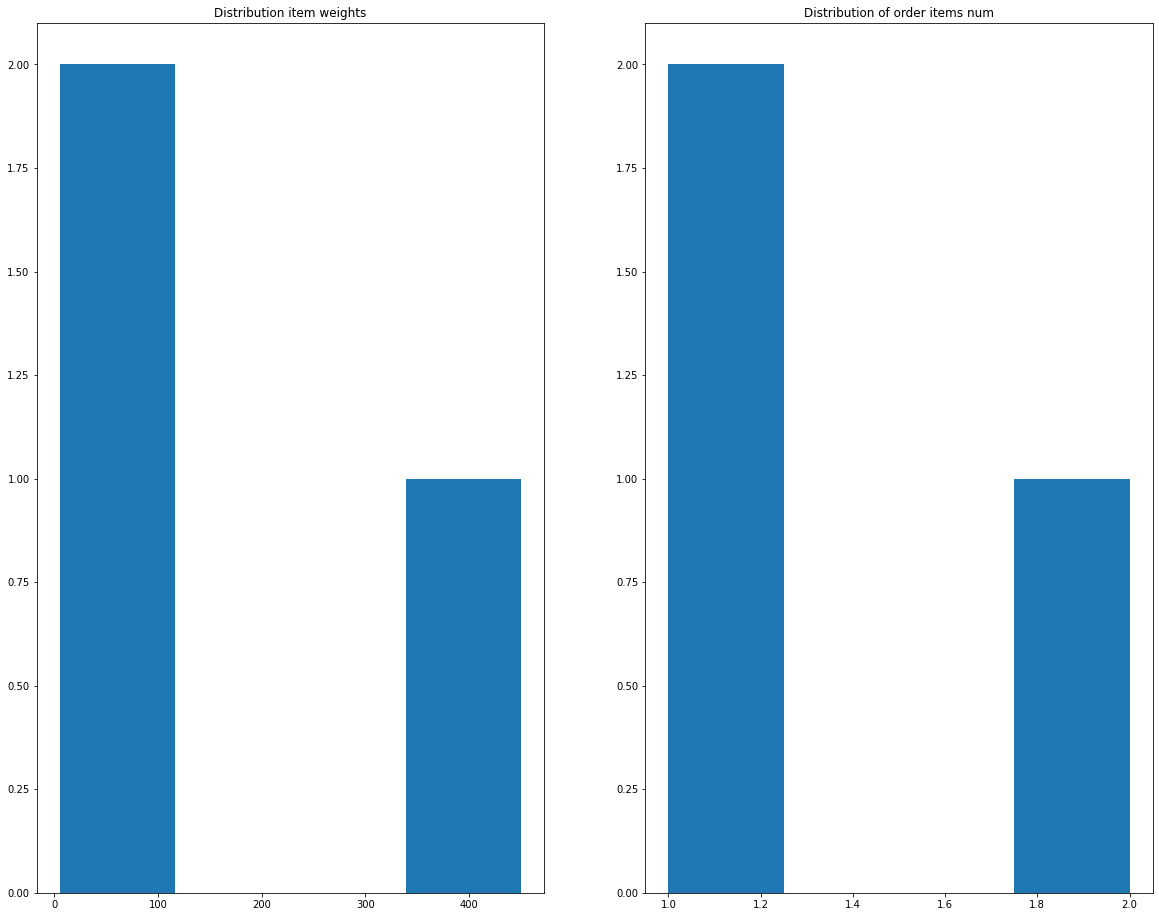

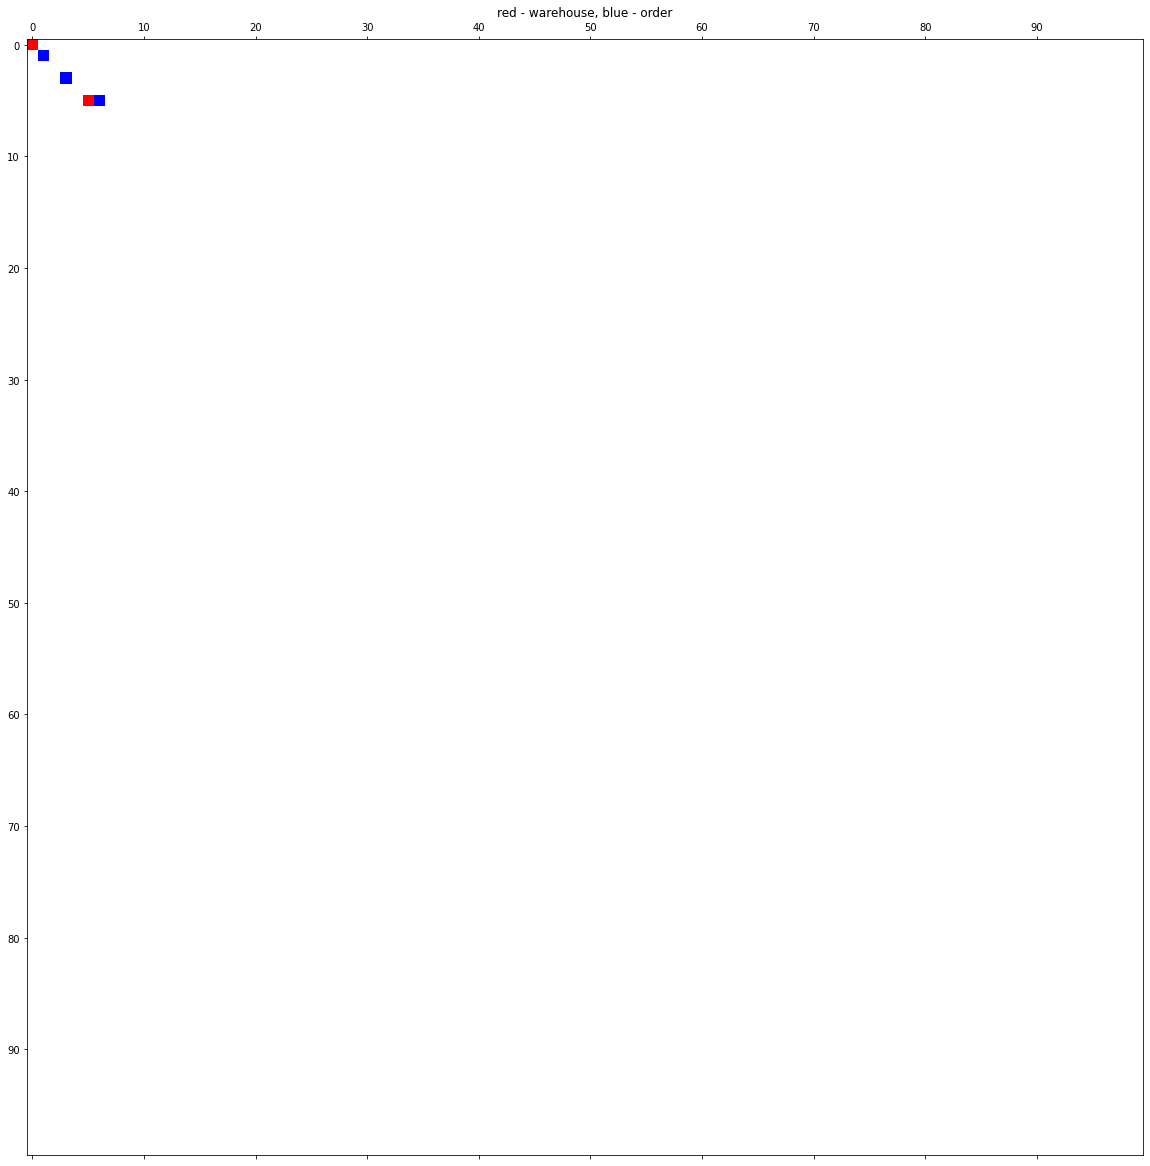




------------------------------
Stats for busy_day.in
World 400x600
Drones num: 30
Simulation time: 112993
Max load for a drone: 200
Number of products: 400
Number of warehouses: 400
Number of orders: 1250


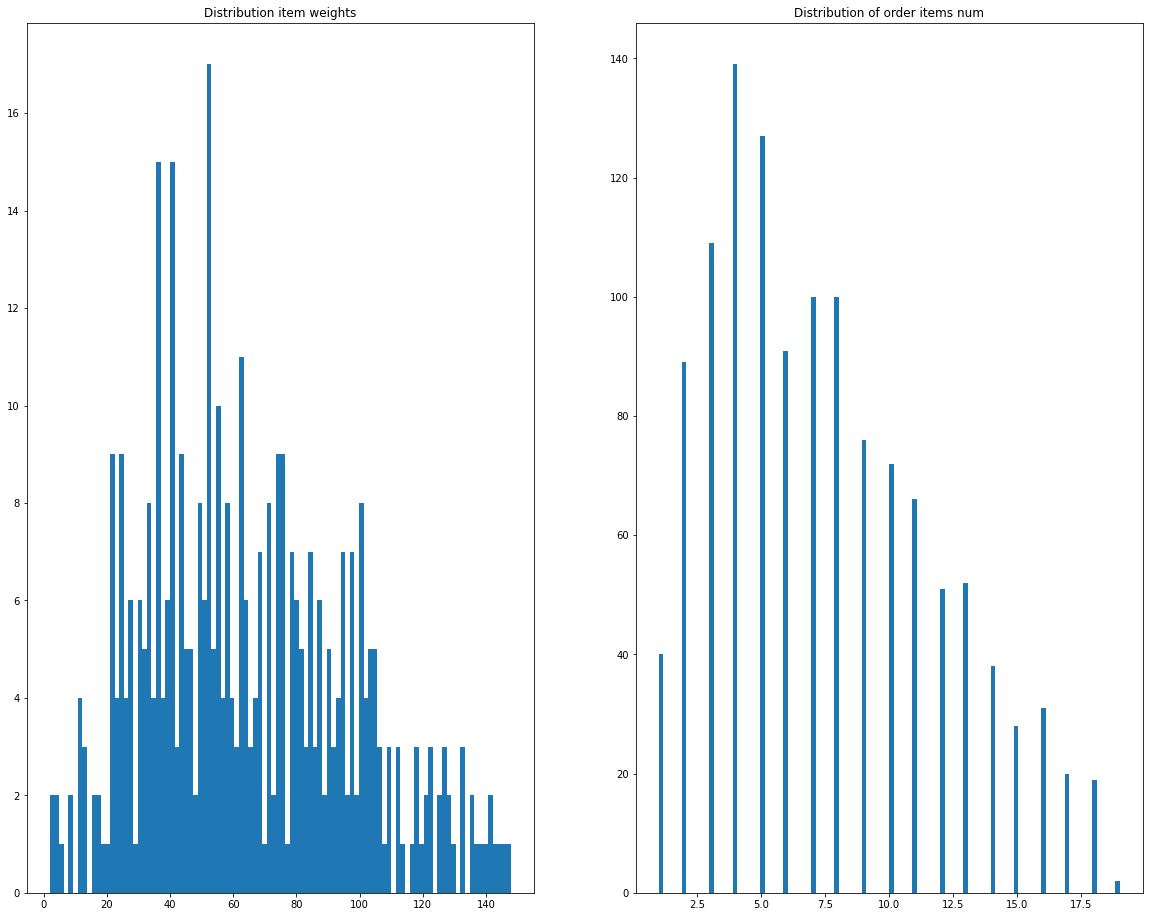

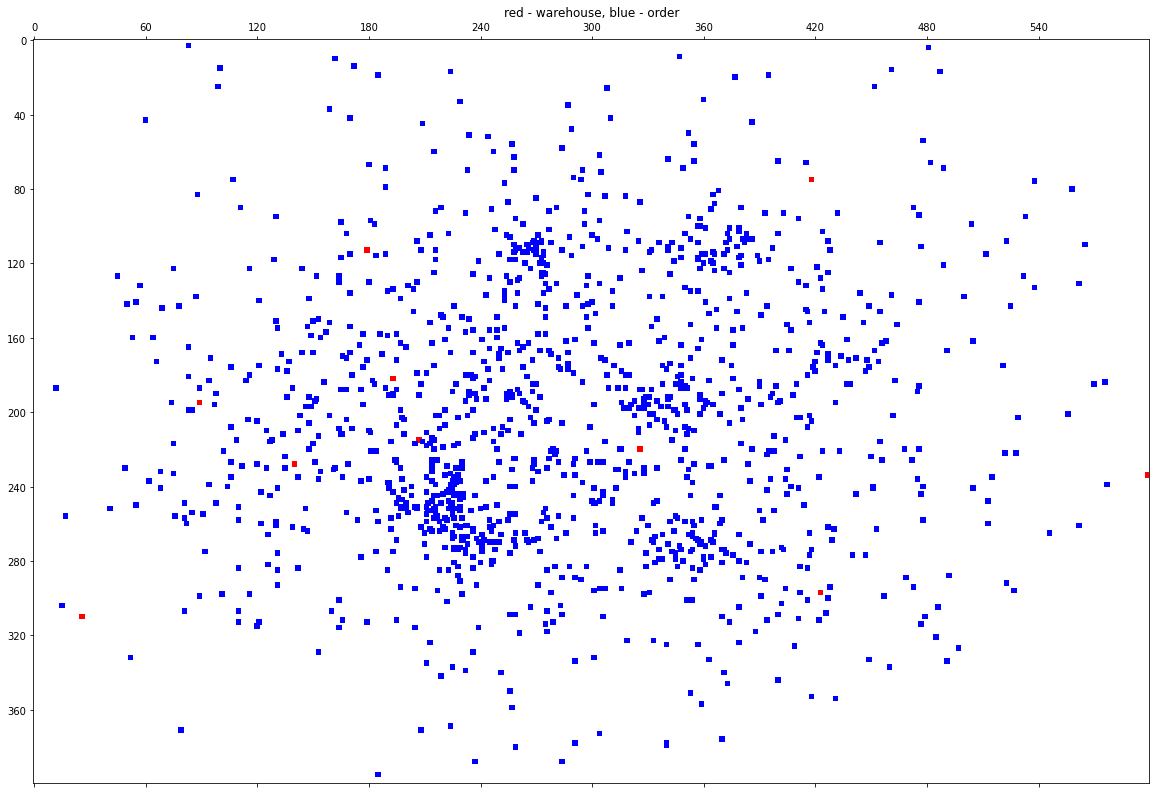




------------------------------
Stats for mother_of_all_warehouses.in
World 240x400
Drones num: 20
Simulation time: 144612
Max load for a drone: 200
Number of products: 1000
Number of warehouses: 1000
Number of orders: 800


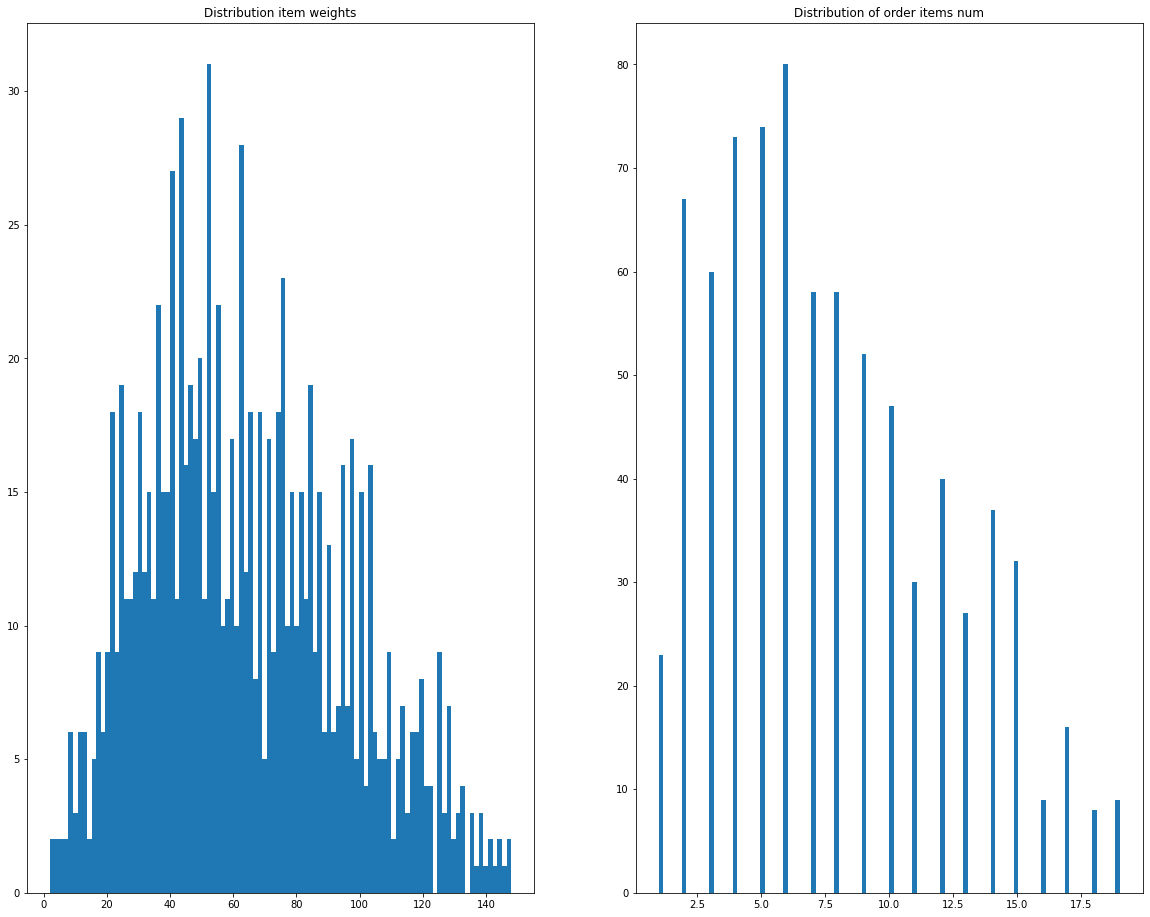

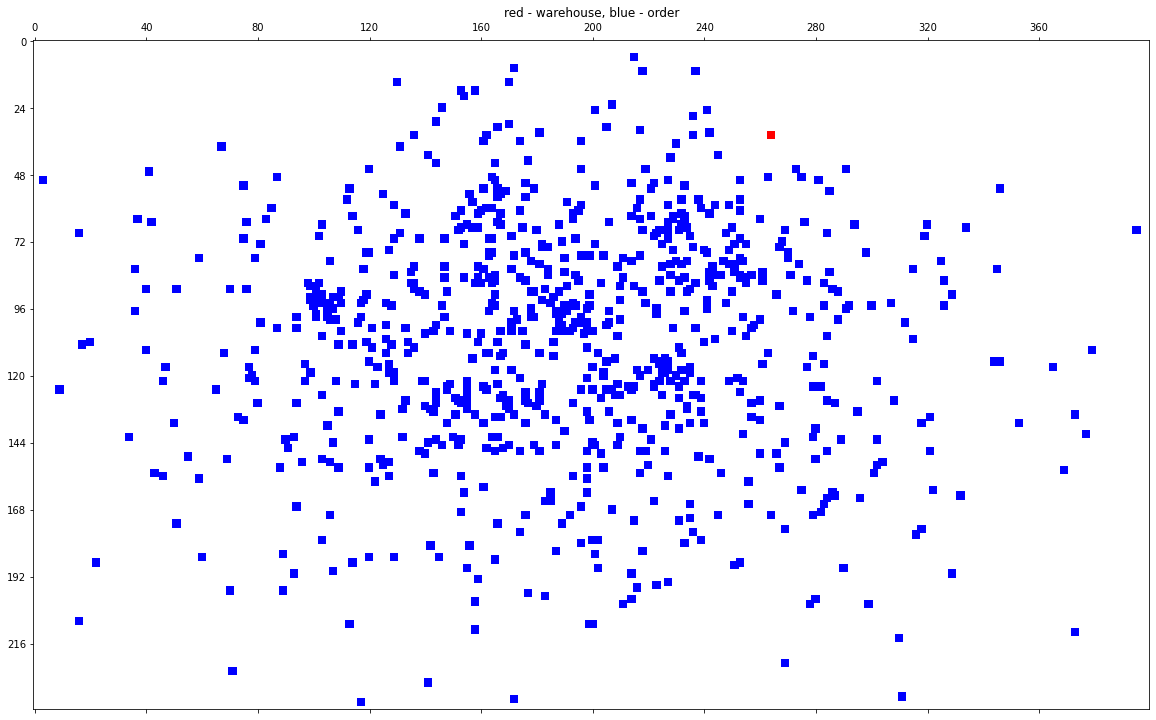




------------------------------
Stats for redundancy.in
World 300x500
Drones num: 30
Simulation time: 145416
Max load for a drone: 200
Number of products: 2000
Number of warehouses: 2000
Number of orders: 1000


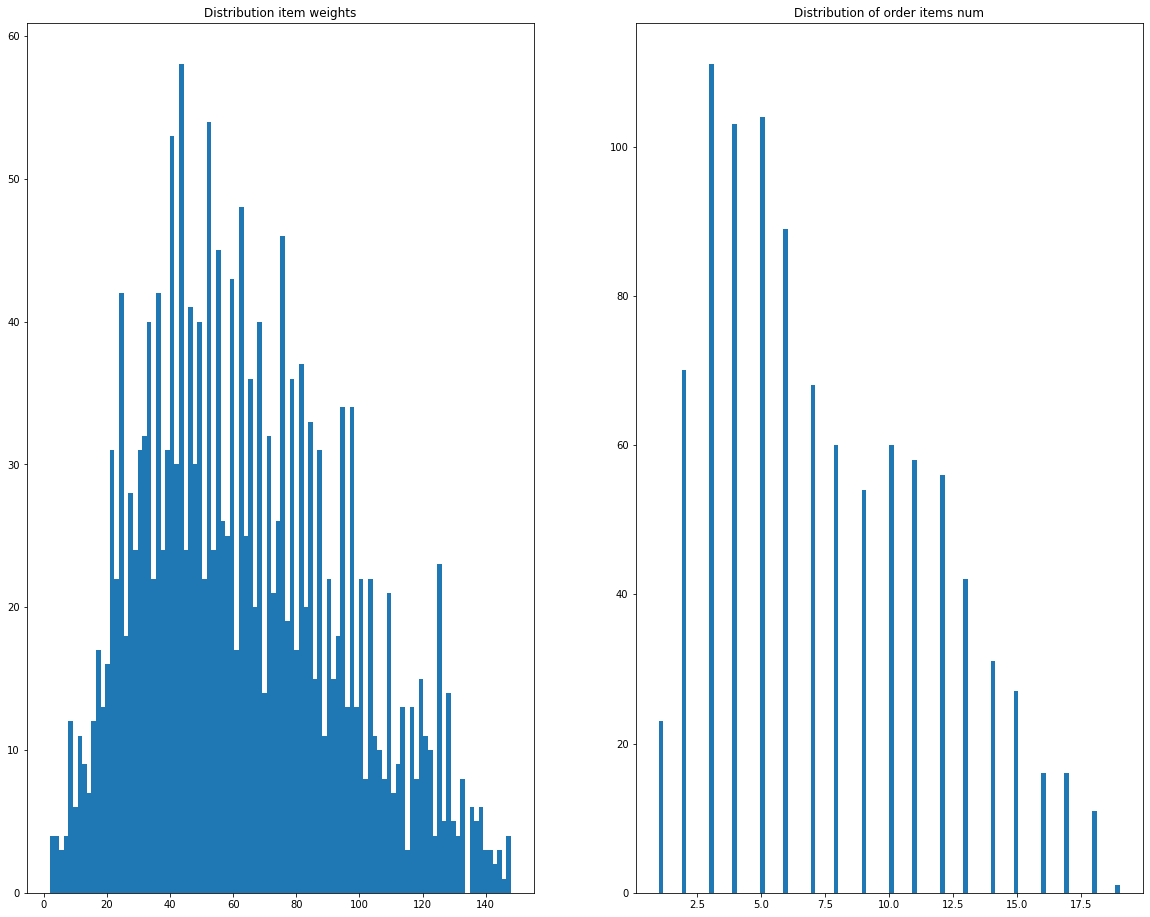

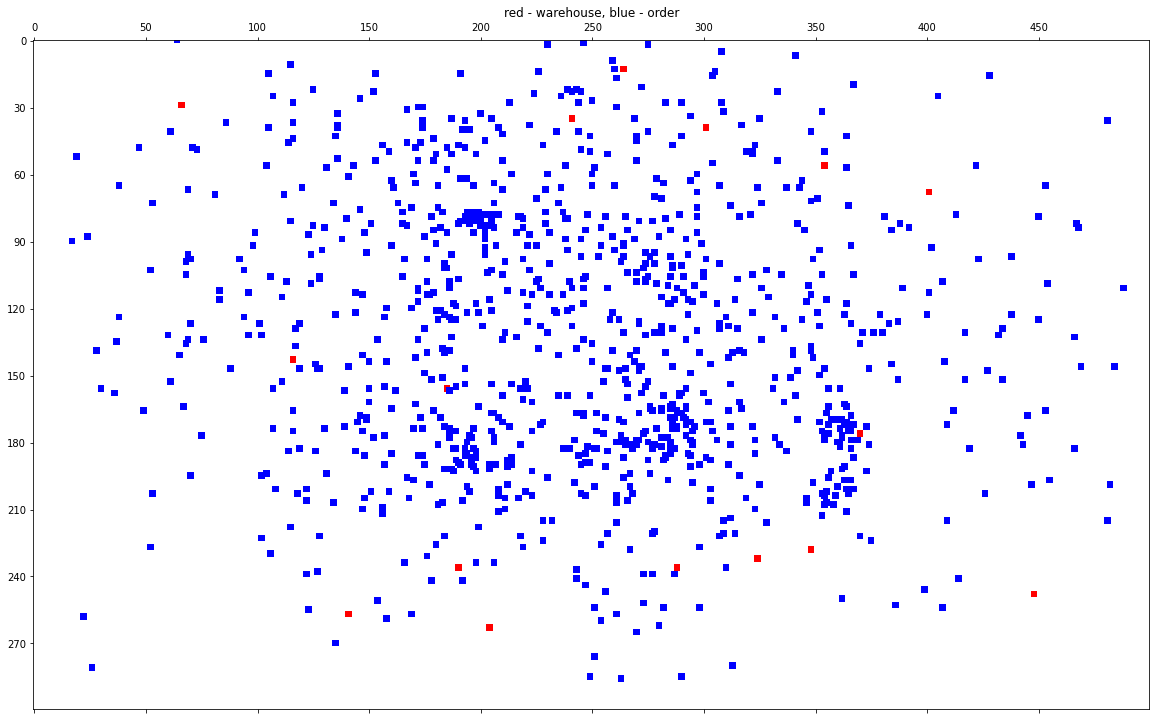




DISRIBUTION OF SCORES BETWEEN TESTS:
A 300 0.10%
BUSY_DAY 125000 40.94%
MOTHER_OF_ALL_WAREHOUSES 80000 26.20%
REDUNDANCY 100000 32.75%


In [12]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display
from collections import Counter

def draw_points(w, h, color_to_points, desc):
    nrows, ncols = w,h
    image = np.ones((nrows, ncols, 3), np.uint8) * 255

    # Set every other cell to a random number (this would be your data)
    for color, points in color_to_points.items():
        for x, y in points:
            image[x][y] = color
            if nrows>100 and ncols > 100:
                for dx in range(-1, 2):
                    for dy in range(-1, 2):
                        if 0<= x + dx < w and 0 <= y + dy < h:
                            image[x+dx][y+dy] = color

    row_labels = range(0, nrows, max(w // 10, 1) )
    col_labels = range(0, ncols, max(h // 10, 1) )

    
    plt.matshow(image)
    plt.title(desc)
    plt.xticks(col_labels, col_labels)
    plt.yticks(row_labels, row_labels)
    fig = plt.gcf()
    fig.set_size_inches(20, 20)
    plt.show()


def analyze_file(f):
    n_rows, n_cols, n_drones, t_sim, max_load = map(int, f.readline().split())
    print("World {}x{}".format(n_rows, n_cols))
    print("Drones num:", n_drones)
    print("Simulation time:", t_sim)
    print("Max load for a drone:", max_load)
    n_products = int(f.readline())
    print("Number of products:", n_products)
    product_weights = list(map(int, f.readline().split()))
    
    n_warehouses = int(f.readline())
    print("Number of warehouses:", n_products)
    warehouse_coords = []
    warehouse_items = []
    for _ in range(n_warehouses):
        warehouse_coords.append(list(map(int, f.readline().split())))
        warehouse_items.append(list(map(int, f.readline().split())))
    
    
    n_orders = int(f.readline())
    print("Number of orders:", n_orders)
    order_coords = []
    order_items = []
    order_n_items = []
    for _ in range(n_orders):
        order_coords.append(list(map(int, f.readline().split())))
        order_n_items.append(int(f.readline()))
        order_items.append(list(map(int, f.readline().split())))
        
    
    fig, axs = plt.subplots(1, 2, figsize=(20, 16))
    axs[0].set_title("Distribution item weights")
    axs[0].hist(product_weights, bins=min(100, len(product_weights)+1))
    
    axs[1].set_title("Distribution of order items num")
    axs[1].hist(order_n_items, bins=min(100, len(order_n_items)+1))
    
    draw_points(n_rows, n_cols, {(255, 0, 0): warehouse_coords, 
                                 (0, 0, 255): order_coords}, 
               "red - warehouse, blue - order")
    
    return n_orders * 100

    
def analyze():
    max_scores = {}
    for filename in sorted(os.listdir("test")):
        if filename.endswith(".in"):
            with open(os.path.join('test', filename)) as f:
                print("-" * 30)
                print("Stats for {}".format(filename))
                max_score = analyze_file(f)
                max_scores[filename.split('.')[0]] = max_score
                print('\n'*2)
                
    print("DISRIBUTION OF SCORES BETWEEN TESTS:")
    sum_max_scores = sum(max_scores.values())
    for k, v in max_scores.items():
        print(k.upper(), v, "{:.2f}%".format(v / sum_max_scores * 100))

analyze()